In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # Import joblib for saving the model

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# Data exploration
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Assume the last column is the target and the rest are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# Handle missing values (example: fill with mean) if any
if X.isnull().sum().any():
    X = X.fillna(X.mean())

In [7]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()


Logistic Regression:
Accuracy: 0.9991222218320986
Recall: 0.5816326530612245
Precision: 0.8636363636363636
F1 Score: 0.6951219512195121


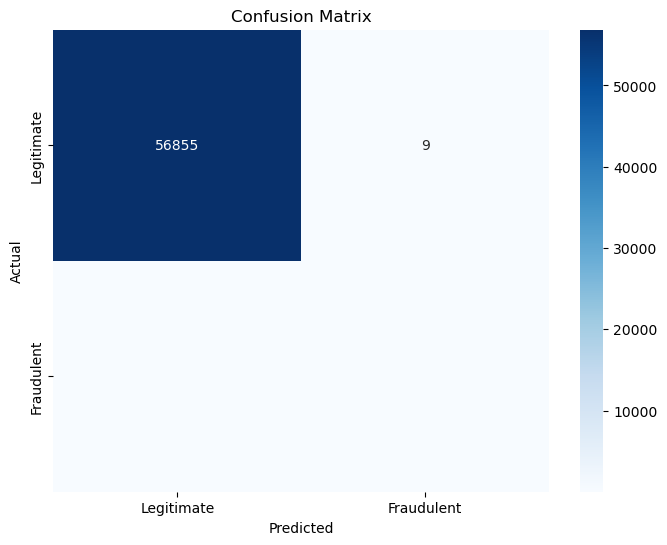

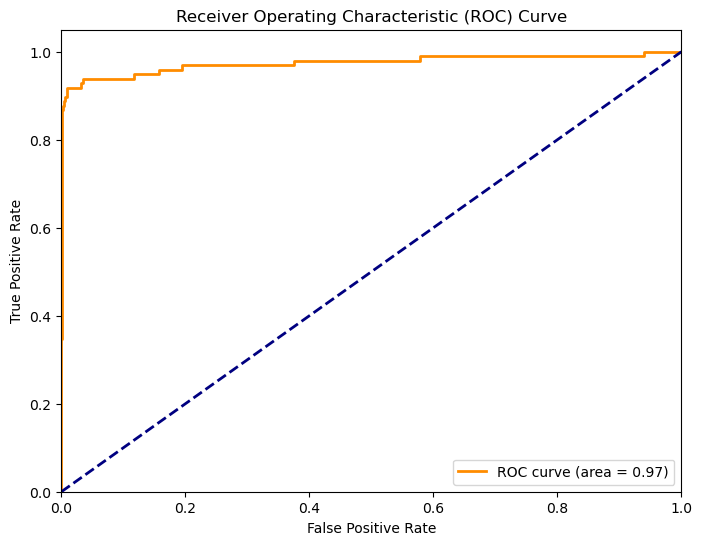

In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(log_reg, X_test, y_test)


Decision Tree:
Accuracy: 0.9990519995786665
Recall: 0.7959183673469388
Precision: 0.6964285714285714
F1 Score: 0.7428571428571428


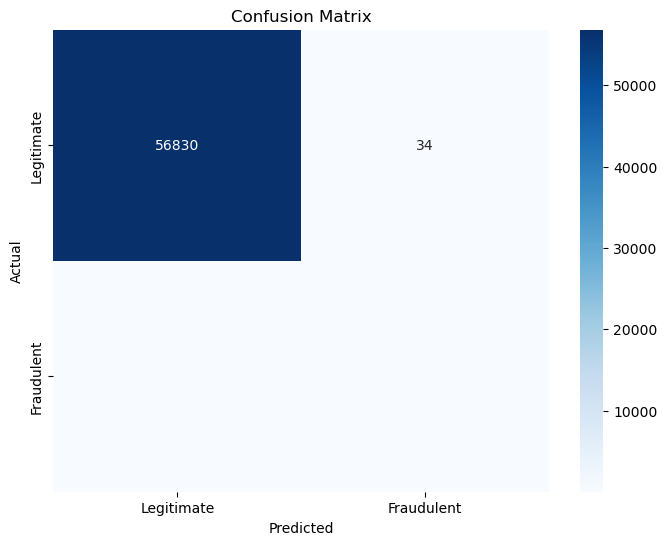

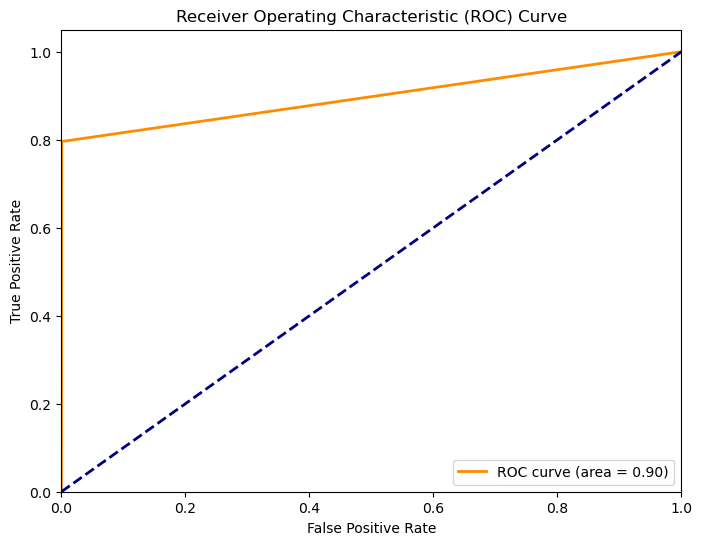

In [11]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
print("Decision Tree:")
evaluate_model(decision_tree, X_test, y_test)

Random Forest:
Accuracy: 0.9995611109160493
Recall: 0.7653061224489796
Precision: 0.974025974025974
F1 Score: 0.8571428571428571


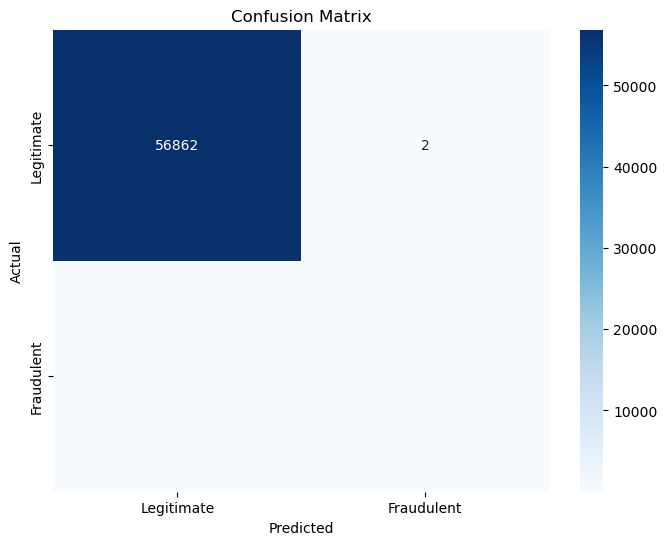

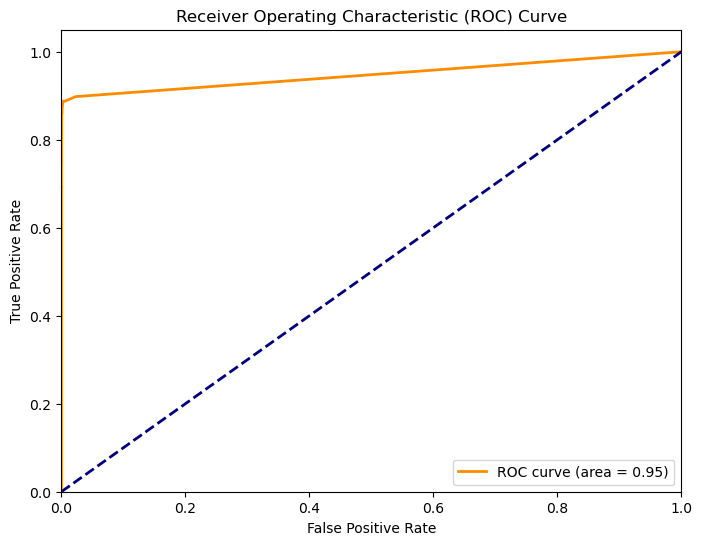

In [12]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
print("Random Forest:")
evaluate_model(random_forest, X_test, y_test)

In [13]:

# Comparison of models
models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree, 'Random Forest': random_forest}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with F1 Score: {results_df.loc[best_model_name, 'F1 Score']}")


Model Comparison:
                      Accuracy    Recall  Precision  F1 Score
Logistic Regression  0.999122  0.581633   0.863636  0.695122
Decision Tree        0.999052  0.795918   0.696429  0.742857
Random Forest        0.999561  0.765306   0.974026  0.857143

Best Model: Random Forest with F1 Score: 0.8571428571428571


In [14]:
# Save the best model (optional)
joblib.dump(best_model, 'best_model.pkl')

# Optional: Load the model and make predictions (for verification)
loaded_model = joblib.load('best_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print(f"Predictions from loaded model: {y_pred_loaded}")


Predictions from loaded model: [1 0 0 ... 0 0 0]
